In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
img = cv2.imread('../data/external/arm.png')/255

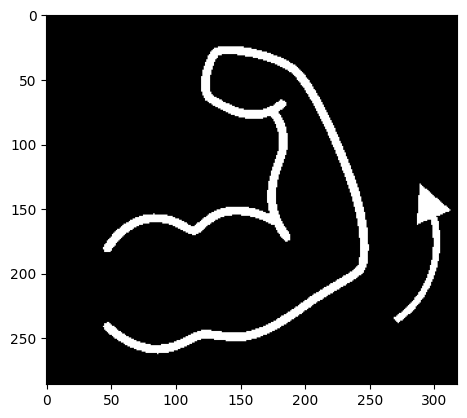

In [26]:
plt.imshow(img, cmap='gray')

In [37]:
img.shape

(286, 318, 3)

In [43]:
# Downscale image
scale_percent = 40 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [44]:
resized.shape

(114, 127, 3)

In [40]:
env = np.zeros((500, 800, 3))
print(env.shape)

(500, 800, 3)


In [45]:
shape = resized.shape
start_x = int(800 / 2 - 70)
start_y = int(500 // 4 + 150)
env[start_y:start_y+shape[0], start_x:start_x+shape[1],:] = resized

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


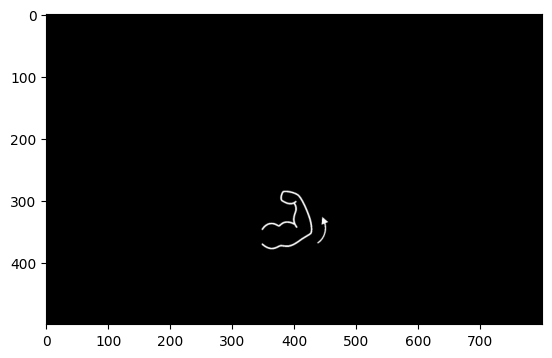

In [46]:
plt.imshow(env)

In [36]:
start_y

275

# Read .mat files

In [26]:
filepath = "C:/Users/annag/Downloads/s01.mat"

In [27]:
mat_contents = scipy.io.loadmat(filepath)

In [28]:
mat_contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'eeg'])

In [47]:
data = mat_contents['eeg'][0][0]

In [48]:
data.dtype

dtype([('noise', 'O'), ('rest', 'O'), ('srate', 'O'), ('movement_left', 'O'), ('movement_right', 'O'), ('movement_event', 'O'), ('n_movement_trials', 'O'), ('imagery_left', 'O'), ('imagery_right', 'O'), ('n_imagery_trials', 'O'), ('frame', 'O'), ('imagery_event', 'O'), ('comment', 'O'), ('subject', 'O'), ('bad_trial_indices', 'O'), ('psenloc', 'O'), ('senloc', 'O')])

In [49]:
np.shape(data['imagery_left'])

(68, 358400)

In [ ]:
data['srate']

In [107]:
data['fs'][0]

array([256], dtype=uint16)

In [47]:
np.shape(data['trialsLabels'])

(1236, 1)

In [48]:
np.shape(data['trialsData'])

(1236, 1)

In [49]:
np.shape(data['trialsData'][0][0])

(1536, 16)

In [50]:
np.shape(data['trialsData'][1235][0])

(1536, 16)

In [51]:
trial_data = data['trialsData']
print(np.shape(trial_data[0][0]))

(1536, 16)


In [52]:
labels = data['trialsLabels'].flatten()
print(np.shape(labels))

(1236,)


In [53]:
labels[1]

1

In [64]:
classnames = ["right wrist","left wrist"]

In [56]:
num_trials = np.shape(data['trialsLabels'])[0]
print(f"Num of Trials: {num_trials}")
num_datapoints, num_channels = np.shape(data['trialsData'][1235][0])
print(f"Num of Datapoints: {num_datapoints}")
print(f"Num of Channels: {num_channels}")


Num of Trials: 1236
Num of Datapoints: 1536
Num of Channels: 16


In [99]:
subj = 'subject'
measurement = data['subjectId'][0]
duration=6
channelnames = ['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8','ch9','ch10','ch11','ch12','ch13','ch14','ch15','ch16']

In [100]:
trial_data = data['trialsData']
labels = data['trialsLabels'].flatten()

dataframe = {}
for trial_idx in range(num_trials):
    label = classnames[labels[trial_idx]]
    sample = trial_data[trial_idx][0]
    sample_df = {}
    sample_df['time_in_s'] = np.arange(0,duration,duration/num_datapoints)
    # Get data of each channel
    for ch in range(num_channels):
        sample_df[channelnames[ch]] = sample[:,ch]
        
    sample_df = pd.DataFrame(sample_df)
    
    # Save information and data in dataframe
    if len(dataframe)==0:
        dataframe['subject'] = [subj]
        dataframe['measurement'] = [measurement]
        dataframe['class'] = [label]
        dataframe['sampleID'] = [trial_idx]
        dataframe['path'] = [filepath]
        dataframe['sample'] = [sample_df]
    else:
        dataframe['subject'].append(subj)
        dataframe['measurement'].append(measurement)
        dataframe['class'].append(label)
        dataframe['sampleID'].append(trial_idx)
        dataframe['path'].append(filepath)
        dataframe['sample'].append(sample_df)

In [101]:
df = pd.DataFrame(dataframe)

In [102]:
df

,subject,measurement,class,sampleID,path,sample
0,subject,PAT021_A,right wrist,0,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 ch3...
1,subject,PAT021_A,left wrist,1,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 ch3 ...
2,subject,PAT021_A,right wrist,2,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 ch3...
3,subject,PAT021_A,right wrist,3,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 ch3 ...
4,subject,PAT021_A,left wrist,4,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 c...
...,...,...,...,...,...,...
1231,subject,PAT021_A,right wrist,1231,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 ch...
1232,subject,PAT021_A,left wrist,1232,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 c...
1233,subject,PAT021_A,left wrist,1233,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 ch...
1234,subject,PAT021_A,right wrist,1234,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 ch3...


In [104]:
df['sample'][0].head()

,time_in_s,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16
0,0.000000,-1.075832,-2.723514,0.168148,3.254819,3.637734,-2.547610,-3.220647,-3.254831,-2.490477,-0.219320,2.957068,3.333702,0.451789,-4.081564,-4.033146,-1.064656
1,0.003906,-3.657143,-5.436400,-1.580259,1.655565,1.921840,-4.310659,-5.528933,-5.338433,-4.279742,-2.015439,0.747582,1.377365,-1.276661,-5.528731,-5.941673,-3.020358
2,0.007812,-5.910010,-7.395266,-2.941333,0.587671,0.062975,-5.607168,-6.829276,-6.004431,-5.342308,-2.407117,-0.544760,0.191823,-1.772736,-4.854354,-5.382417,-2.992874
3,0.011719,-7.114160,-8.085546,-3.722995,0.323191,-1.448621,-6.362695,-6.961522,-5.286970,-5.194376,-1.026775,-0.407237,0.428577,-1.329027,-2.277282,-2.213352,-0.600662
4,0.015625,-7.226933,-7.741441,-4.109986,0.424940,-2.425853,-6.442323,-6.047697,-3.855508,-3.744331,1.524592,0.907767,1.646668,-0.549005,1.153902,2.339494,3.119517


In [95]:
sample = trial_data[trial_idx][0]

In [98]:
np.shape(sample[:,0])

(1536,)

In [89]:
duration = 6
num_samplepoints = np.shape(sample)[0]
time_in_s = np.arange(0,duration,duration/num_samplepoints)

## Make dataset

In [2]:
from src.data.make_dataset import BCIDataset

In [8]:
data_root = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/data/raw/"
subjects = ["BCI_course"]
measurements = ["PAT021_A"]
classnames = ["right wrist","left wrist"]
duration = 6
sample_rate = 256

In [11]:
mydataset = BCIDataset(data_root, subjects, measurements, classnames, sample_rate, duration, filetype="mat")
mydataset.data.head()

,subject,measurement,class,sampleID,path,sample
0,BCI_course,PAT021_A,right wrist,0,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 ch3...
1,BCI_course,PAT021_A,left wrist,1,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 ch3 ...
2,BCI_course,PAT021_A,right wrist,2,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 ch3...
3,BCI_course,PAT021_A,right wrist,3,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 ch3 ...
4,BCI_course,PAT021_A,left wrist,4,C:/Users/annag/OneDrive - Danmarks Tekniske Un...,time_in_s ch1 ch2 c...


## Rename Nurias Files

In [18]:
import os
import pandas as pd

In [25]:
path_root = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/data/raw/nuria/nuri_06"
directory = os.listdir(path_root)

In [28]:
for filename in directory:
    new_filename = filename.replace(" ", "_")
    new_filename = new_filename.replace("__", "_")
    new_filename = new_filename.replace("left", "arm_left")
    new_filename = new_filename.replace("right", "arm_right")
    
    os.rename(os.path.join(path_root,filename),os.path.join(path_root,new_filename))